### 百度百科的1000个词条

In [4]:
# %load week08-2.py
"""
Created on Fri Sep 09 15:18:29 2016

@author: Administrator
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs
from scipy import ndimage
from sklearn import manifold, datasets
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer 

In [7]:
####第一步 计算TFIDF####
    
#文档预料 空格连接
corpus = []
    
#读取预料 一行预料为一个文档
for line in open('01_All_BHSpider_Content_Result.txt', 'r').readlines():
    #print line
    corpus.append(line.strip())
corpus[:2], len(corpus)

(['\ufeff北京故宫 北京故宫 ， 全名 北京故宫博物院 ， 旧 称为 紫禁城 ， 位于 北京 中轴线 的 中心 ， 是 中国 明 、 清 两代 24 位 皇帝 的 皇家 宫殿 ， 是 中国 古代 汉族 宫廷 建筑 之 精华 ， 无与伦比 的 建筑 杰作 ， 也 是 世界 上 现存 规模 最大 、 保存 最为 完整 的 木质 结构 古建筑 之一 。 它 有 大小 宫殿 七十 多座 ， 房屋 九千余 间 ， 以 太和 、 中 和 、 保和三 大殿 为 中心 。 北京故宫 由 明成祖 朱棣 永乐 四年 （ 公元 1406 年 ） 开始 建设 ， 以 南京 故宫 为 蓝本 营建 ， 到 明代 永乐 十八年 （ 公元 1420 年 ） 建成 ， 占地面积 约 为 72 万平方米 ， 建筑面积 约 为 15 万平方米 ， 它 是 一座 长方形 城池 ， 东西 宽 七百 五十三 米 ， 南北 长 九百 六十一 米 。 周围 筑 有 十米 多高 的 城墙 ， 并 有 一条 宽 五十二 米 的 护城河 环绕 ， 构成 了 “ 城中 之 城 ” 。 宫殿 建筑 均 是 木结构 、 黄 琉璃瓦 顶 、 青 白石 底座 。 故宫 被誉为 世界 五大 宫之首 （ 北京故宫 、 法国 凡尔赛宫 、 英国 白金汉宫 、 美国白宫 和 俄罗斯 克里姆林宫 ） ， 已 被 列为 世界 文化遗产 、 全国 重点 文物保护 单位 、 国家 AAAAA 级 旅游 景区 。 2014 年 11 月 23 日 ， 北京故宫 吉祥物 首度 对外 亮相 ， 该 吉祥物 源自 中国 传统 的 吉祥 龙凤 形象 ， 分别 为龙 “ 壮壮 ” 和 凤 “ 美美 ” 。 2015 年 6 月 13 日 ， 故宫博物院 试行 限流 8 万人次 和 实名制 售票 。 2015 年 10 月 11 日 ， 故宫博物院 正式 对 观众 开放 慈宁宫 区域 、 午门 雁翅楼 区域 、 东华门 等 新 的 区域 ， 使 故宫 的 开放 面积 由 目前 的 52 % 增加 至 65 % ， 带给 观众 更加 完整 丰富 的 参观 体验 。 [ 1 ]',
  '天坛公园 天坛 ， 世界 文化遗产 ， 全国 重点 文物保护 单位 ， 国家 AAAAA 级 旅游 景区 ， 全国 文明 风景 旅游区 示范点 。 天坛 ， 在 北京市

In [10]:
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()
word[:5],len(word)

(['00', '000', '01', '02', '03'], 17900)

In [11]:
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

#打印特征向量文本内容
print( 'Features length:'+str(len(word)))

Features length:17900


In [12]:
resName = "BHTfidf_Result.txt"
result = codecs.open(resName, 'w', 'utf-8')
for j in range(len(word)):
    result.write(word[j] + ' ')
result.write('\r\n\r\n')

In [13]:
#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
for i in range(len(weight)):
    #print u"-------这里输出第", i, u"类文本的词语tf-idf权重------"  
    for j in range(len(word)):
        #print weight[i][j],
        result.write(str(weight[i][j]) + ' ')
    result.write('\r\n\r\n')

In [14]:
result.close()

In [15]:
####第二步 聚类Kmeans####
print ('Start Kmeans:')
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=4)   #景区 动物 人物 国家
s = clf.fit(weight)
print(s)


#中心点
print(clf.cluster_centers_)

Start Kmeans:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 2.75705192e-04 -5.42101086e-19  5.55025287e-04 ... -1.27393755e-18
   5.50062054e-04 -1.62630326e-19]
 [ 9.95152680e-04  3.79470760e-19  1.20497247e-03 ...  5.14996032e-19
   9.48676901e-19  8.13151629e-20]
 [ 0.00000000e+00  1.96371149e-03  8.28830840e-04 ...  2.43945489e-19
   1.02999206e-18  3.25260652e-19]
 [ 0.00000000e+00  4.87890978e-19 -1.40946282e-18 ...  8.79294537e-04
   9.75781955e-19  1.05535115e-03]]


In [16]:
#每个样本所属的簇
label = []               #存储1000个类标 4个类
print(clf.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 0 3 3 3 3 3 3 

In [17]:
i = 1
while i <= len(clf.labels_):
    print (i, clf.labels_[i-1])
    label.append(clf.labels_[i-1])
    i = i + 1

#用来评估簇的个数是否合适，距离越小说明簇分的越好，选取临界点的簇个数  958.137281791
print(clf.inertia_)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 

[[-0.04232458 -0.07567521]
 [-0.06648974 -0.06855677]
 [-0.04481392 -0.08227989]
 ...
 [-0.0538505   0.04547598]
 [-0.05186506  0.02256296]
 [-0.04875872  0.05170747]]


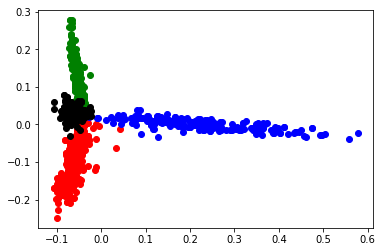

In [18]:
####第三步 图形输出 降维####
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维
print (newData)

#5A景区
x1 = []
y1 = []
i=0
while i<400:
    x1.append(newData[i][0])
    y1.append(newData[i][1])
    i += 1

#动物
x2 = []
y2 = []
i = 400
while i<600:
    x2.append(newData[i][0])
    y2.append(newData[i][1])
    i += 1

#人物
x3 = []
y3 = []
i = 600
while i<800:
    x3.append(newData[i][0])
    y3.append(newData[i][1])
    i += 1

#国家
x4 = []
y4 = []
i = 800
while i<1000:
    x4.append(newData[i][0])
    y4.append(newData[i][1])
    i += 1
    

#四种颜色 红 绿 蓝 黑
plt.plot(x1, y1, 'or')
plt.plot(x2, y2, 'og')
plt.plot(x3, y3, 'ob')
plt.plot(x4, y4, 'ok')
plt.show()